In [1]:
from math import sqrt

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sea

In [2]:
#Configurações para o matplotlib:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12,8)

sea.set()

<h3> Criar distribuição </h3>

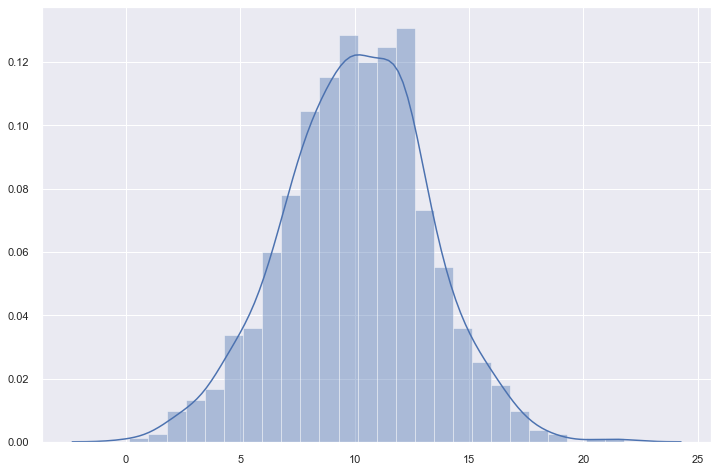

In [3]:
distribuicaonormal = st.norm.rvs(loc = 10, scale = 3, size = 1000)
#loc é a média
#scale é o desvio padrão 
#portanto a variância é scale²
#size é o tamanho, quantos queremos gerar
sea.distplot(distribuicaonormal)

In [4]:
#tupla para verificar a média e desvio padrão:
(distribuicaonormal.mean(), distribuicaonormal.std())

#Ligeiramente diferente, afinal são valores aleatórios

(10.073187943523347, 3.1146765881565086)

In [5]:
#Para encontrar P (X <= 8) temos a função cdf:
a = st.norm.cdf(8, loc = 10, scale = 3)
a

0.2524925375469229

In [6]:
#Utilizando a média, e se a distribuição é simétrica:
st.norm.cdf(10, loc = 10, scale = 3)

0.5

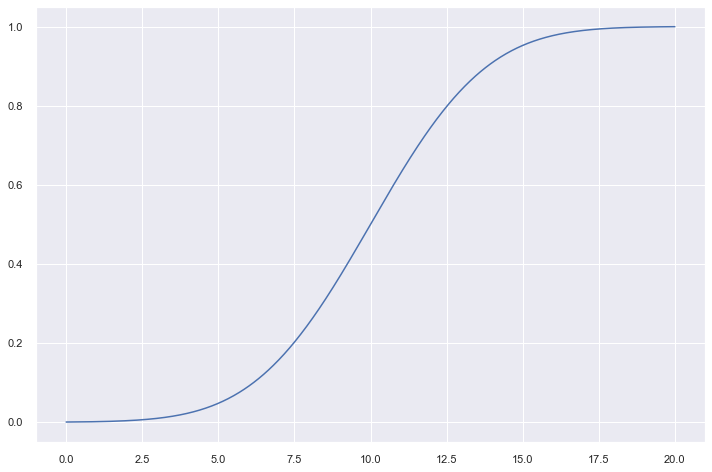

In [7]:
#Gráfico da cdf:
#Vetor de tamanho 1000, com espaçamento de 2 em 2:
x = np.linspace(0, 20, num = 1000)


f = lambda x: st.norm.cdf(x, loc = 10, scale = 3)

cdf = f(x)

sea.lineplot(x, cdf)

In [8]:
#Para achar a probablidade de P>= 8
b = st.norm.sf(8, loc = 10, scale = 3)
b

0.7475074624530771

In [9]:
a + b

1.0

In [10]:
#Função ppf para achar P(X <= x) = 0.25
st.norm.ppf(0.25, loc = 10, scale = 3)

7.976530749411754

In [11]:
st.norm.ppf(0.75, loc = 10, scale = 3)

12.023469250588246

In [12]:
#Para acima utilizamos:
st.norm.isf(0.25, loc = 10, scale = 3)

12.023469250588246

In [13]:
#Para a função densidade de probabilidade (QUE NÃO REPRESENTA UMA PROBABILIDADE:)
st.norm.pdf(8, loc = 10, scale = 3)

0.10648266850745075

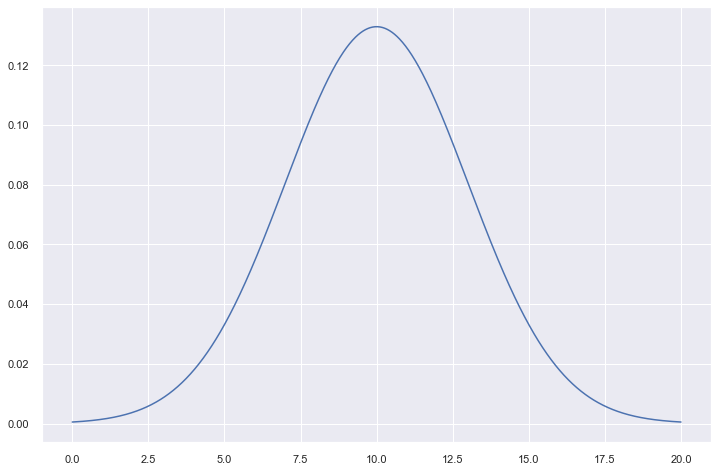

In [14]:
#Gráfico da pdf:
x = np.linspace(0, 20, num = 1000)

f = lambda x: st.norm.pdf(x, loc = 10, scale = 3)

pdf = f(x)

sea.lineplot(x, pdf)

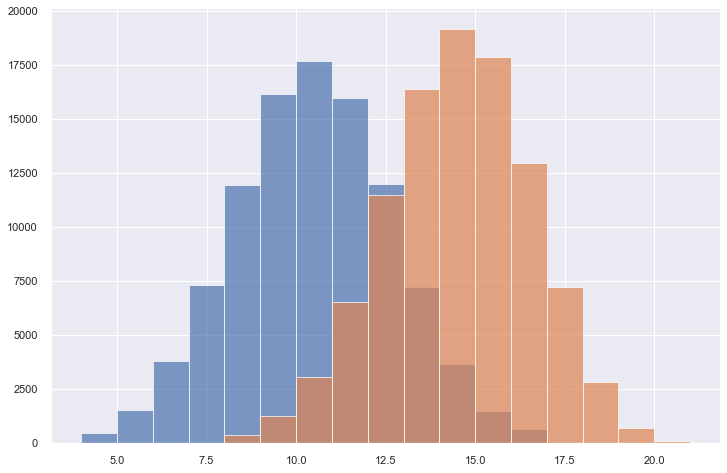

In [15]:
binom_20_05 = st.binom.rvs(20, 0.5, size = 100000)
binom_20_07 = st.binom.rvs(20, 0.7, size = 100000)


#Se **kwars são argumentos opcionais, este hist_kws são so argumentos opcionais do seaborn?
sea.distplot(binom_20_05, bins = range(4,18), kde = False, hist_kws={"alpha": 0.7})
sea.distplot(binom_20_07, bins = range(8,22), kde = False, hist_kws={"alpha": 0.7})

In [16]:
#Probabilidade de obter no máximo 3 caras em 20 lançamentos de uma moeda viciada que possui probabilidade de 0,1 de sair cara

#Probabilidade de sucesso: p = 0.1
#Lançamentos, espaço amostral da binomial: 20, logo n = 20
#Sucessos: quero saber a probabilidade de obter P(X <= 3)

#k: número de sucessos; n: número de lançamentos; p: probabilidade
st.binom.cdf(k = 3, n = 20, p = 0.1)

0.867046676565665

In [17]:
#k = 10
#n = 20
#p = 0.1

st.binom.sf(k = 9, n = 20, p = 0.1)

7.150904021083785e-06

<h3> Aproximação da Binomial pela Normal </h3>

In [18]:
#Exemplo 4 : 
#k = 50
#n = 200
#p = 0.3 (moeda viciada)

#Podemos utilizar a função normal para aproximar esse valor, inclusive comparar. 

k = 50
n = 200
p = 0.3

media = n*p
variancia = n*p*(1-p)


st.norm.sf(k, loc = media, scale = sqrt(variancia))

0.9385886759493037

In [19]:
#Utilizando a própria binomial:
st.binom.sf(k = k - 1 , n = n, p = p)

0.9494082059701145